In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score,confusion_matrix

In [3]:
#load train data
train_data = pd.read_csv('train.csv')

In [4]:
#load test data
test_data = pd.read_csv('test.csv')

In [5]:
#print head data
train_data.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [6]:
#summary statistics of numerical features
print("Summary statistics of numerical features:")
train_data.describe()

Summary statistics of numerical features:


,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#information about the dataset
print("Information about the dataset:")
train_data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136

In [8]:
#check is null data
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
#value count for target data
train_data['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [10]:
import pandas as pd

# Sort the dataset based on 'Machine failure' column
sorted_data = train_data.sort_values(by='Machine failure')

# Remove the index column
sorted_data.reset_index(drop=True, inplace=True)

# Print 'Product ID' and 'Machine failure' columns
print(sorted_data[['Product ID', 'Machine failure']])


       Product ID  Machine failure
0          L50096                0
1          L53412                0
2          M15541                0
3          M24725                0
4          M15257                0
...           ...              ...
136424     L48677                1
136425     L51465                1
136426     L48961                1
136427     L51816                1
136428     L55111                1

[136429 rows x 2 columns]


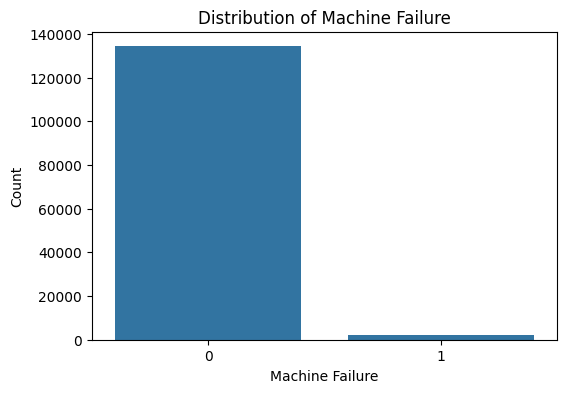

In [11]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=train_data)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

In [12]:
  # Define X (features) and y (target)
  X = train_data .drop(columns=['Machine failure'])
  y = train_data ['Machine failure']

  # Random Oversampling
  oversampler = RandomOverSampler()
  X_resampled, y_resampled = oversampler.fit_resample(X, y)

  # Create DataFrame with resampled data
  train_data = pd.DataFrame(X_resampled, columns=X.columns)
  train_data['Machine failure'] = y_resampled

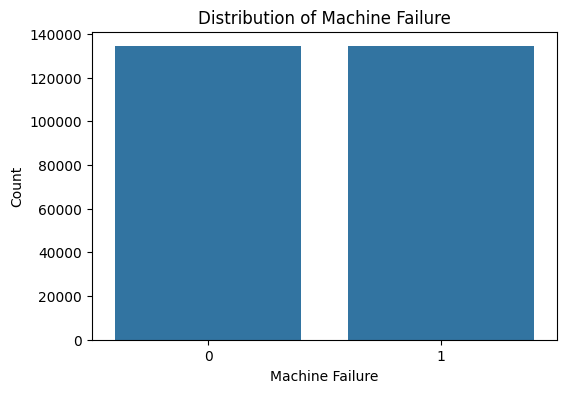

In [13]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=train_data)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

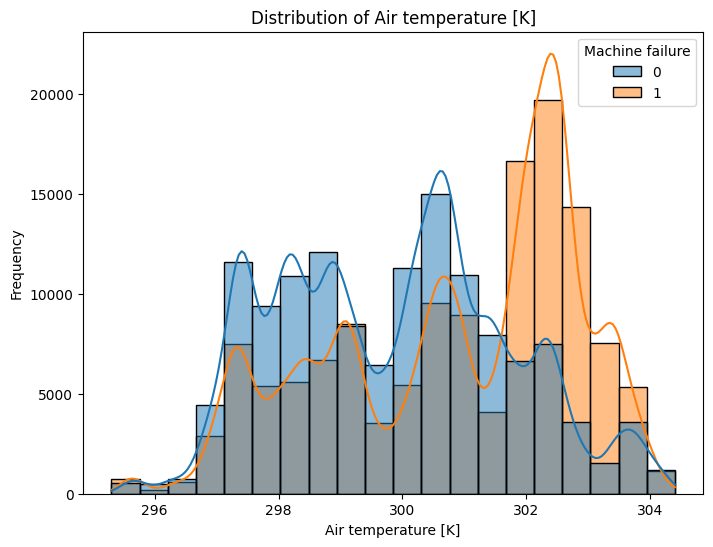

In [14]:
#Distribution of Air temperature [K]


plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Air temperature [K]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Air temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Frequency')
plt.show()

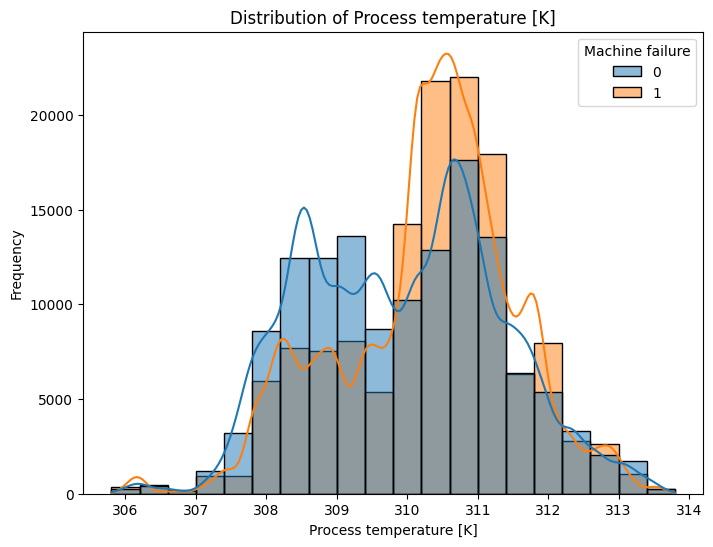

In [15]:
#Distribution of Process temperature [K]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Process temperature [K]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Process temperature [K]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Frequency')
plt.show()

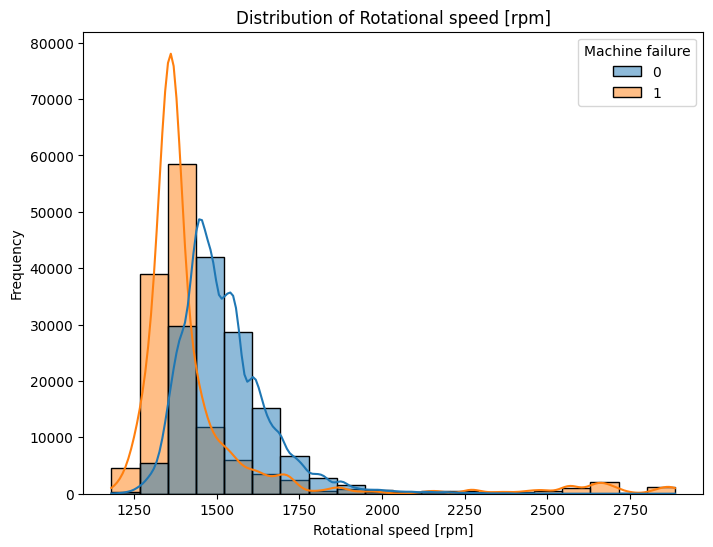

In [16]:
# Distribution of Rotational speed [rpm]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Rotational speed [rpm]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Rotational speed [rpm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Frequency')
plt.show()

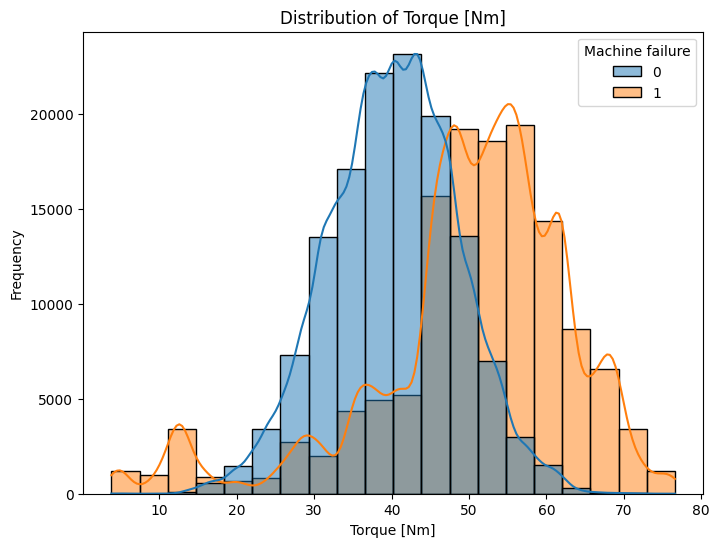

In [17]:
#Distribution of Torque [Nm]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Torque [Nm]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')
plt.show()

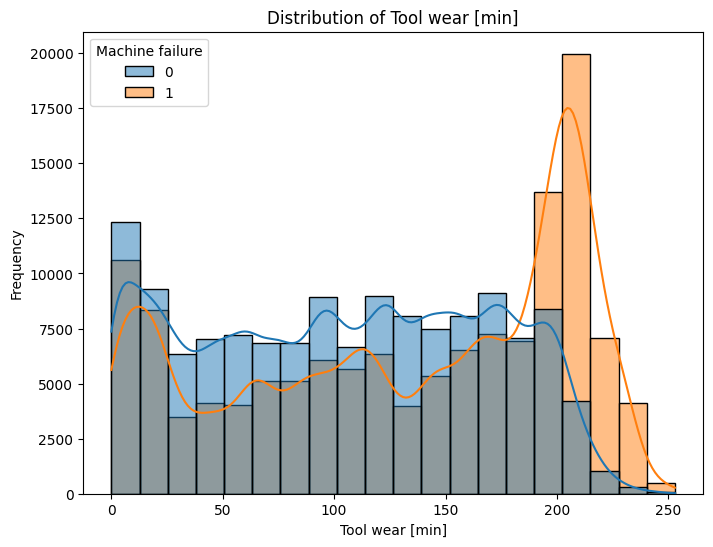

In [18]:
#Distribution of Tool wear [min]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Tool wear [min]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Tool wear [min]')
plt.xlabel('Tool wear [min]')
plt.ylabel('Frequency')
plt.show()

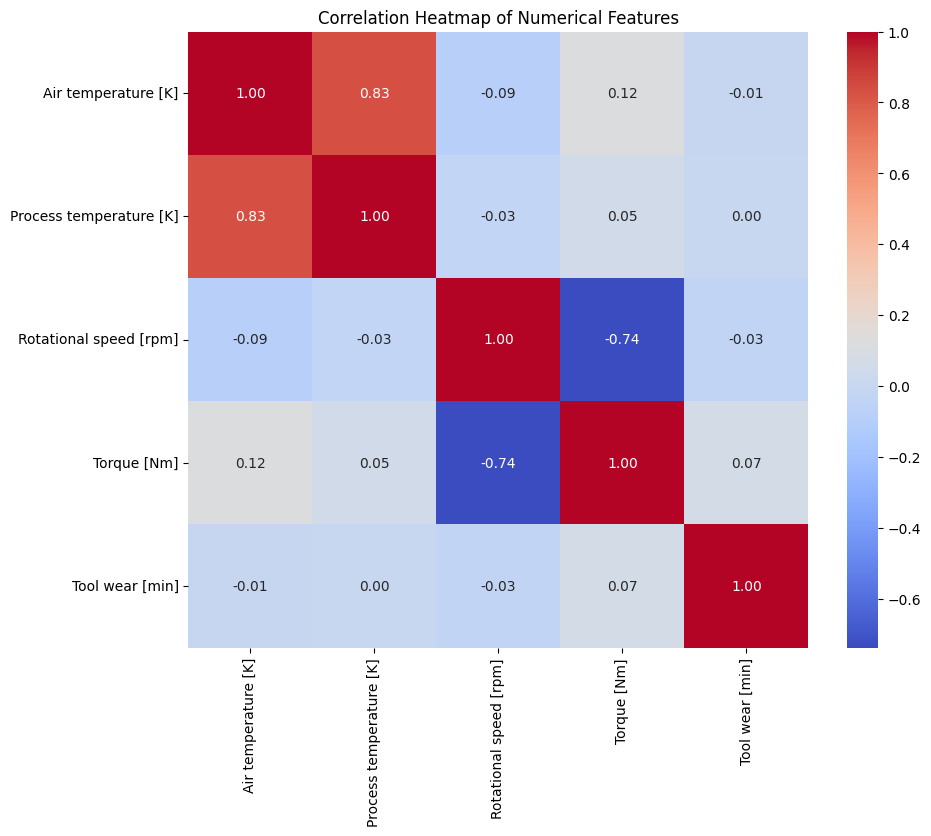

In [19]:
# Correlation heatmap of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

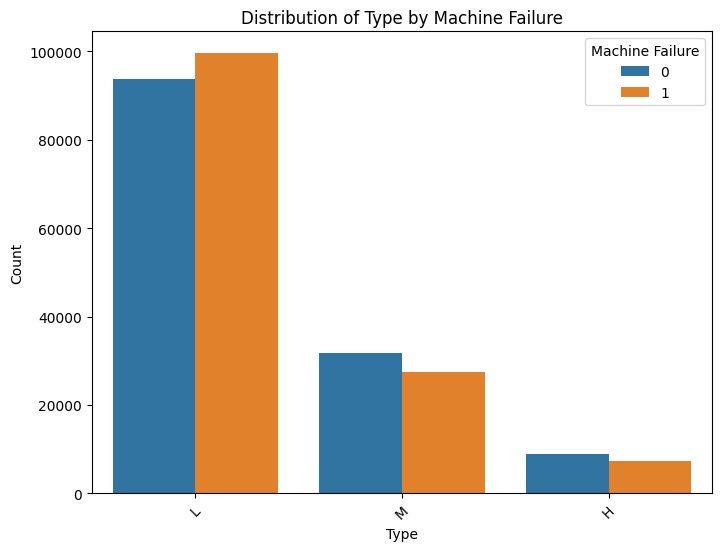

In [20]:
# Distribution of 'Type' by 'Machine failure'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', hue='Machine failure', data=train_data)
plt.title('Distribution of Type by Machine Failure')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Machine Failure', loc='upper right')
plt.show()

In [21]:
# create a new feature 'Temperature Difference' which represents the difference between 'Air temperature [K]' and 'Process temperature [K]'
train_data['Temperature Difference'] = train_data['Air temperature [K]'] - train_data['Process temperature [K]']

In [22]:
#print head data after new Feature
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure,Temperature Difference
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,-9.0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,-9.5
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,-9.2
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,-9.9
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,-11.0


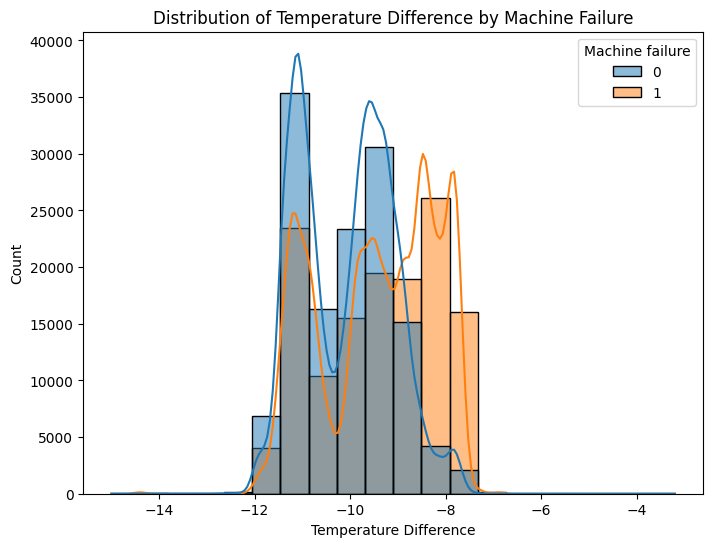

In [23]:
# Visualize the distribution of the new feature by 'Machine failure'
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Temperature Difference', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Temperature Difference by Machine Failure')
plt.xlabel('Temperature Difference')
plt.ylabel('Count')
plt.show()

In [24]:
#check is null data
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Machine failure            0
Temperature Difference     0
dtype: int64

In [25]:
# Drop 'id' and 'Product ID' columns
train_data.drop(columns=['id', 'Product ID'], inplace=True)

In [26]:
# Encoding categorical variables
label_encoder = LabelEncoder()

train_data['Type'] = label_encoder.fit_transform(train_data['Type'])

In [27]:
# Scaling numerical features
scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

In [44]:
# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=['Machine failure'])
y = train_data['Machine failure']

In [45]:
# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier()
}

In [46]:
# Dictionary store mean cross-validation scores
cv_scores = {}

In [47]:
# Perform cross-validation for each model
for name, model in models.items():
    print("name model : ",name)
    scores = cross_val_score(model, X[:10000], y[:10000], cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(cv_scores[name])


name model :  RandomForest
0.9964999999999999
name model :  SVC
0.9856999999999999
name model :  LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9953
name model :  KNeighbors
0.9907


In [48]:
# Print mean cross-validation scores
for name, score in cv_scores.items():
    print(f'{name}: {score}')

RandomForest: 0.9964999999999999
SVC: 0.9856999999999999
LogisticRegression: 0.9953
KNeighbors: 0.9907


In [49]:
# Get the best model
best_model = max(cv_scores, key=cv_scores.get)
print(f'Best model: {best_model} with mean cross-validation score of {cv_scores[best_model]}')

Best model: RandomForest with mean cross-validation score of 0.9964999999999999


In [50]:
# Initialize best model
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

In [51]:
# Train the best model on the entire training data
#best_model.fit(train_data.drop(columns=['Machine failure']), train_data['Machine failure'])
best_model.fit(X, y)

RandomForestClassifier()

In [37]:
# Make predictions on the training data
train_predictions = best_model.predict(train_data.drop(columns=['Machine failure']))

In [38]:
#copy columns id
test_data_id = test_data['id']

# Feature Engineering (Temperature Difference)
test_data['Temperature Difference'] = test_data['Air temperature [K]'] - test_data['Process temperature [K]']

# Drop 'id' and 'Product ID' columns
test_data.drop(columns=['id', 'Product ID'], inplace=True)


# Encoding categorical variables
test_data['Type'] = label_encoder.transform(test_data['Type'])

# Scaling numerical features
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Make predictions on the test data
test_predictions = best_model.predict(test_data)

In [39]:
# Create a DataFrame with 'id' and 'Prediction' columns
predictions_df = pd.DataFrame({'id':test_data_id ,
                               'Machine failure': test_predictions})

In [40]:
# Save the predictions to a CSV file
predictions_df.to_csv("predictions.csv", index=False)

In [41]:
from google.colab import files

# Save the predictions to a CSV file
predictions_df.to_csv("predictions.csv", index=False)

# Download the CSV file
files.download("predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import pickle
from google.colab import files

# Assuming 'best_model' is your trained model object
# Save the trained model using pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Download the saved model file
files.download('trained_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Save preprocessing objects
with open('preprocessing_objects.pkl', 'wb') as file:
    pickle.dump((label_encoder, scaler), file)

files.download('preprocessing_objects.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>